In [132]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

**Prelimanary invtestigation**

In [133]:
print(df.shape)
print(df.index)
df.head()

(212331, 15)
RangeIndex(start=0, stop=212331, step=1)


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

**Selected 3 feature/measure/score and converted them from object to float64.**
***errors='coerce'*- when set, it replaces invalid or unparseable values with NaN (Not a Number). As a result below columns with value: 's' were converted to NaN (Not a Number)**
1.   Mean Score
2.   Percent Scoring Below 65
3.   Percent Scoring 80 or Above

**Dropped below 2 columns which contains a large number of Non-Standard missing values**
*   Number Scoring CR
*   Percent Scoring CR

**Dropped all rows with NaN values**

**Added column for School District/Borough**

In [135]:
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce')

df['Percent Scoring Below 65'] = pd.to_numeric(df['Percent Scoring Below 65'], errors='coerce')

df['Percent Scoring 80 or Above'] = pd.to_numeric(df['Percent Scoring 80 or Above'], errors='coerce')

df.drop(['Number Scoring CR','Percent Scoring CR'],inplace=True,axis=1) ## dropping these 2 columns as they contain a large number of Non-Standard missing values.

df.dropna(inplace=True) ## Remove rows with values NaN.

School_borough = df['School DBN'].str.extract(r'(\D)') # extract school Borought from DBM
df['School Borough'] = School_borough # add this column to the dataframe

School_district = df['School DBN'].str.extract(r'(\d{2})') # extract school dsitrict from DBM
df['School District'] = School_district # add this column to the dataframe

In [136]:
df.describe()


,Year,Total Tested,Mean Score,Percent Scoring Below 65,Percent Scoring 80 or Above
count,137101.000000,137101.000000,137101.000000,137101.000000,137101.000000
mean,2015.957630,71.584970,65.999558,41.932103,22.692899
std,0.809277,107.837188,11.288937,28.405841,26.161494
min,2015.000000,6.000000,15.000000,0.000000,0.000000
25%,2015.000000,18.000000,58.300000,17.500000,2.200000
50%,2016.000000,39.000000,65.400000,40.200000,12.500000
75%,2017.000000,82.000000,73.400000,64.000000,34.500000
max,2017.000000,1729.000000,98.700000,100.000000,100.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Total Tested'}>],
       [<Axes: title={'center': 'Mean Score'}>,
        <Axes: title={'center': 'Percent Scoring Below 65'}>],
       [<Axes: title={'center': 'Percent Scoring 80 or Above'}>,
        <Axes: >]], dtype=object)

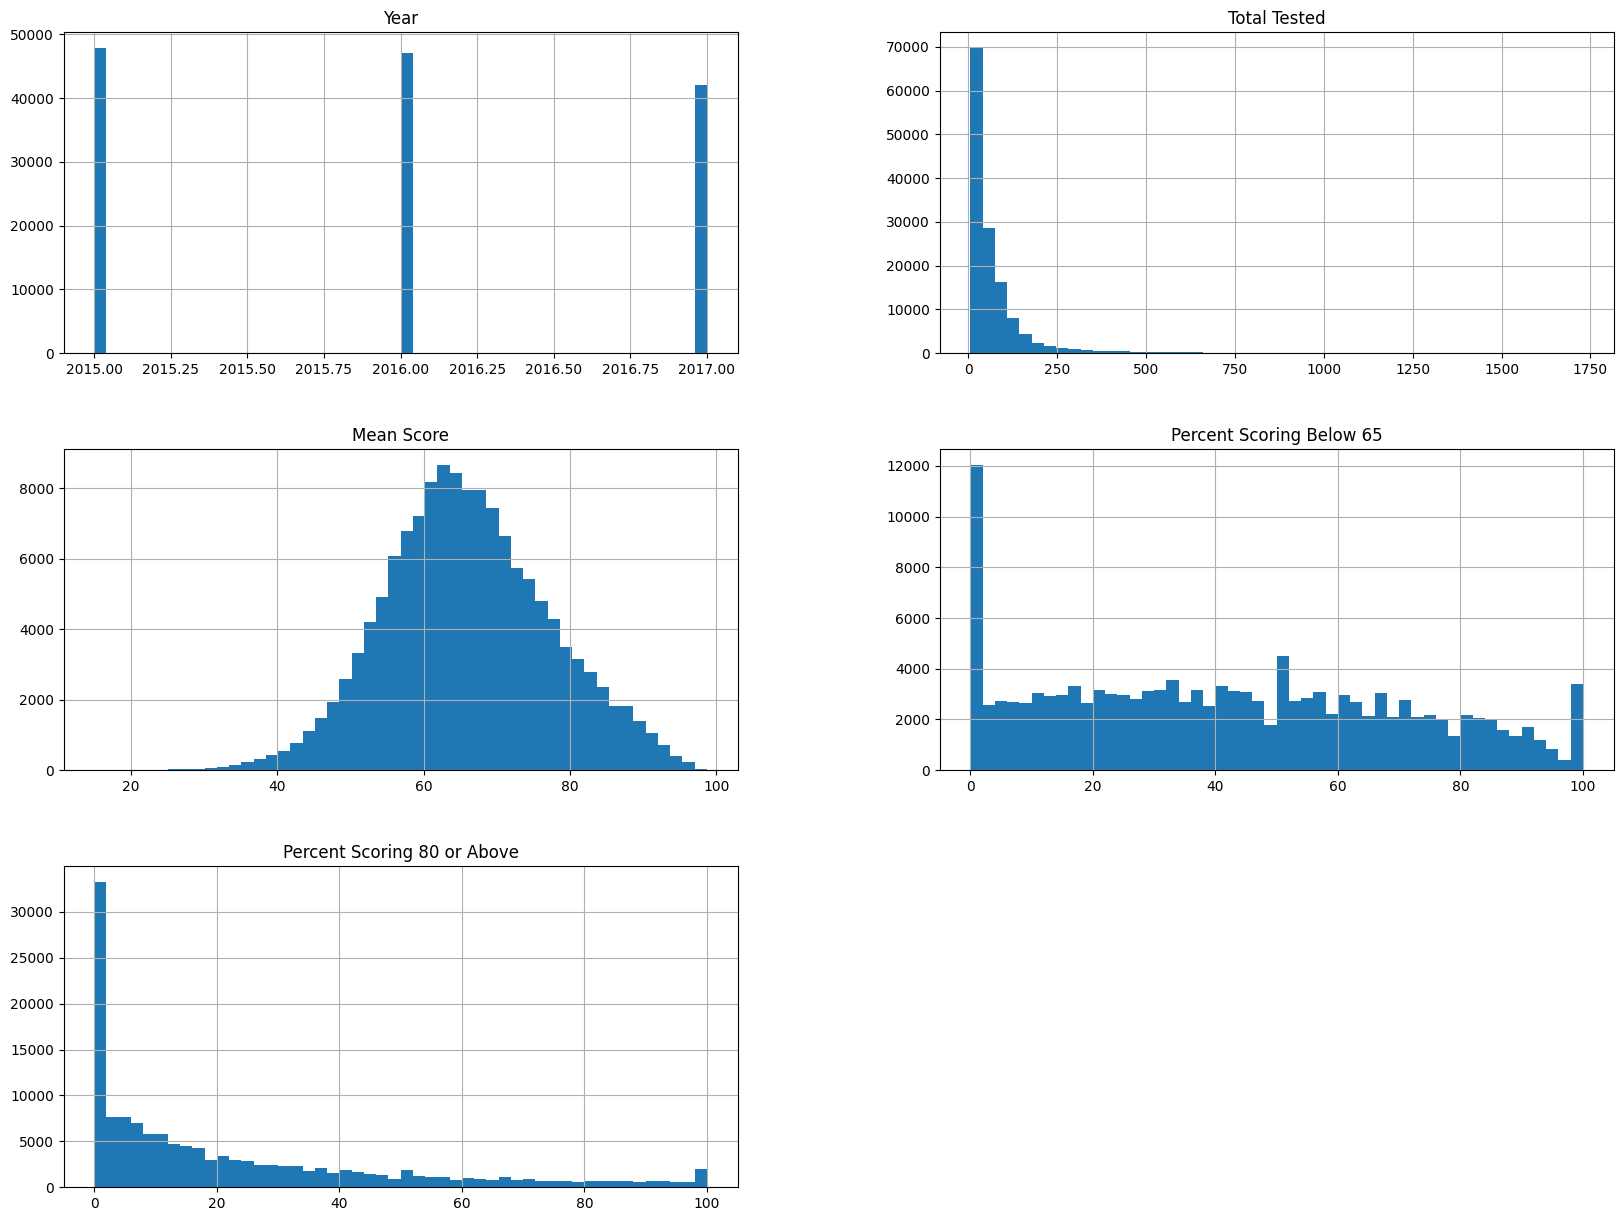

In [137]:
df.hist(bins=50, figsize=(20,15))

**School Selected = East Side Community School. View average Mean Score for the school.**

In [138]:
df1 = df[df['School Name'].str.contains('East Side Community School')]

df1.groupby(['School Name'])['Mean Score'].agg(['min','max','median','mean']).round(2)


,min,max,median,mean
School Name,,,,
East Side Community School,70.7,88.8,79.0,78.16


In [139]:
# Comparing schools

pd.set_option('display.max_rows', 20) # None display all rows
df.groupby(['School Name'])['Mean Score'].agg(['min','max', 'median','mean']).sort_values('median',ascending = False).round(2)


,min,max,median,mean
School Name,,,,
The Anderson School,82.6,96.8,92.70,91.36
Stuyvesant High School,81.1,97.4,92.50,91.70
East Side Middle School,82.7,94.9,92.30,90.41
The Christa McAuliffe School\I.S. 187,88.0,93.9,91.25,90.97
New York City Lab Middle School for Collaborative,83.5,93.9,91.25,90.16
...,...,...,...,...
Academy for Social Action,27.1,78.8,50.50,50.03
P.S./M.S 042 R. Vernam,45.3,61.8,50.45,52.54
Highland Park Community School,37.7,74.7,49.80,54.37


In [140]:
#School in Borough = Brooklyn ('K')
df2 = df[df['School Borough'].str.contains('K')]

df2.groupby(['School Name'])[['Mean Score','Percent Scoring 80 or Above','Percent Scoring Below 65']].median().sort_values('Percent Scoring 80 or Above',ascending = False).round(2)


,Mean Score,Percent Scoring 80 or Above,Percent Scoring Below 65
School Name,,,
The Christa McAuliffe School\I.S. 187,91.25,100.0,0.0
Brooklyn Dreams Charter School,82.80,100.0,0.0
I.S. 98 Bay Academy,90.60,100.0,0.0
Hellenic Classical Charter School,86.60,100.0,0.0
M.S. 51 William Alexander,87.80,97.9,0.0
...,...,...,...
Roads Charter School I,54.90,0.0,75.4
P.S./I.S. 137 Rachel Jean Mitchell,62.95,0.0,44.1
South Shore Educational Complex Yabc,55.70,0.0,71.4


<Axes: title={'center': 'med(Mean Score) by Borough'}, ylabel='Mean Score'>

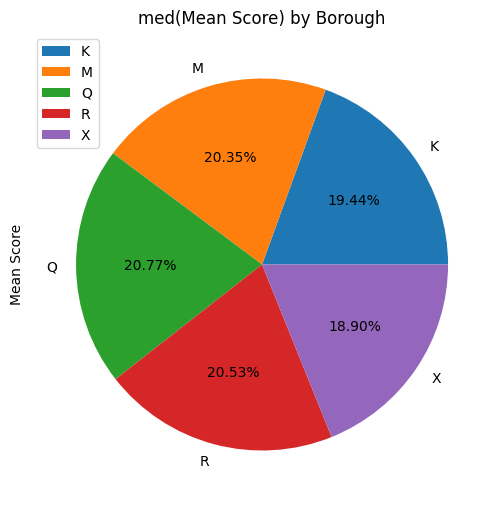

In [141]:
#Visualizations
df.groupby(['School Borough'])[['Mean Score']].median().plot(kind='pie', y='Mean Score', autopct="%1.2f%%", title="med(Mean Score) by Borough", figsize=(6, 8))


Regents Exam
Common Core English                68.50
U.S. History and Government        67.90
Living Environment                 64.80
Integrated Algebra                 63.70
English                            63.60
Common Core Algebra                63.10
Physical Settings/Physics          62.30
Physical Settings/Chemistry        60.60
Common Core Algebra2               60.00
Global History and Geography       59.50
Physical Settings/Earth Science    59.40
Geometry                           59.00
Common Core Geometry               55.20
Algebra2/Trigonometry              51.95
Name: Mean Score, dtype: float64


<Axes: title={'center': 'Regents Exam med(Mean Score) in the Bronx.'}, xlabel='Mean Score', ylabel='Regents Exam'>

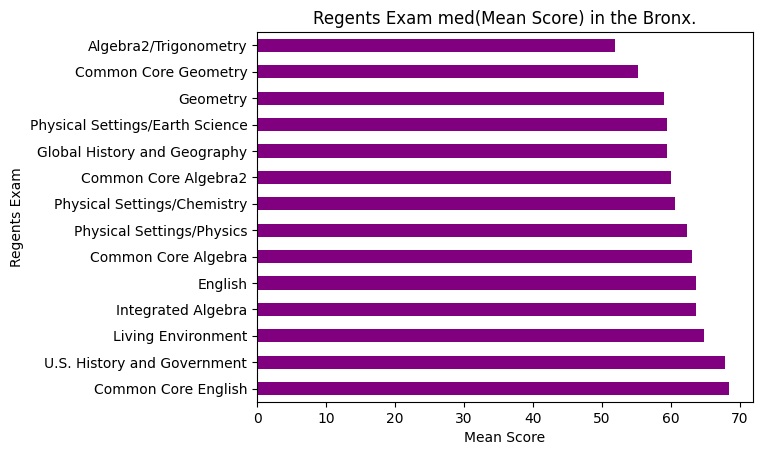

In [142]:
df3 = df[df['School Borough'].str.contains('X')]

print(df3.groupby(['Regents Exam'])['Mean Score'].median().sort_values(ascending = False))
df3.groupby(['Regents Exam'])['Mean Score'].median().sort_values(ascending = False).plot(kind='barh', title='Regents Exam med(Mean Score) in the Bronx.', color='purple', xlabel = 'Mean Score', legend = False)


**Observations**

**Analysis of student test performance:**
During 2015 – 2016, students at ‘The Anderson School’ had the highest med(Mean Score) of 92.70%, and students at ‘P.S. 165 Ida Posner’ had the lowest 48.15%.
In Brooklyn, students test performance in 4 schools had a med(Percent Scoring 80 or Above) of 100%.
In all 5 Boroughs, Bronx had the lowest med(Mean Score) of ‘18.90%’ for students test performance. On drilling down, I noticed that the med(Mean Score) of students in 12 out of 14 Regents Exam was < 65.